# COURSE: Improving data quality in data analytics & machine learning
## SECTION: Assessing data quality
### LECTURE: Code: Measuring data quality
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dataquality_x/?couponCode=202204

In [19]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the data

In [20]:
# import the data from the web
url = "https://sincxpress.com/sampledata.csv"
df = pd.read_csv(url)

# have a quick look
df

,var1,var2,var3
0,-5.0,15.0,-5
1,-13.0,11.0,-8
2,0.0,1.0,12
3,9.0,22.0,15
4,4.0,0.0,6
5,-7.0,24.0,0
6,-16.0,46.0,-15
7,15.0,29.0,14
8,15.0,29.0,14
9,NaN,-14.0,27


In [21]:
df.describe()#look at some feature of the data. ingores the nan

,var1,var2,var3
count,20.000000,20.000000,21.000000
mean,-1.100000,25.450000,4.095238
std,10.356285,29.770128,10.676632
min,-20.000000,-14.000000,-15.000000
25%,-7.750000,10.750000,-5.000000
50%,0.500000,24.000000,3.000000
75%,5.250000,29.500000,12.000000
max,15.000000,129.000000,27.000000


# Check for repeated rows

In [25]:
# check for presence of duplicate rows
areRepeats = df.duplicated()
print(f'There are {np.sum(areRepeats)} repeated rows!')

There are 0 repeated rows!


In [24]:
# and remove them
df = df.drop_duplicates() #drop all the duplicates
df # check and re-run previous code for confirmation

,var1,var2,var3
0,-5.0,15.0,-5
1,-13.0,11.0,-8
2,0.0,1.0,12
3,9.0,22.0,15
4,4.0,0.0,6
5,-7.0,24.0,0
6,-16.0,46.0,-15
7,15.0,29.0,14
9,NaN,-14.0,27
10,1.0,26.0,3


# Some plotting

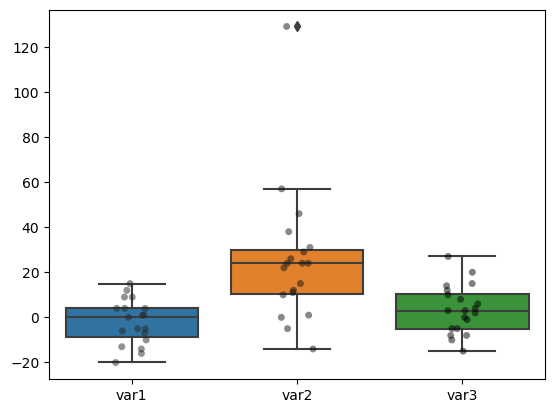

In [27]:
# box plots
sns.boxplot(data=df)
sns.stripplot(data=df,marker='o',palette='dark:k',alpha=.5);
#there is an outlier in our data

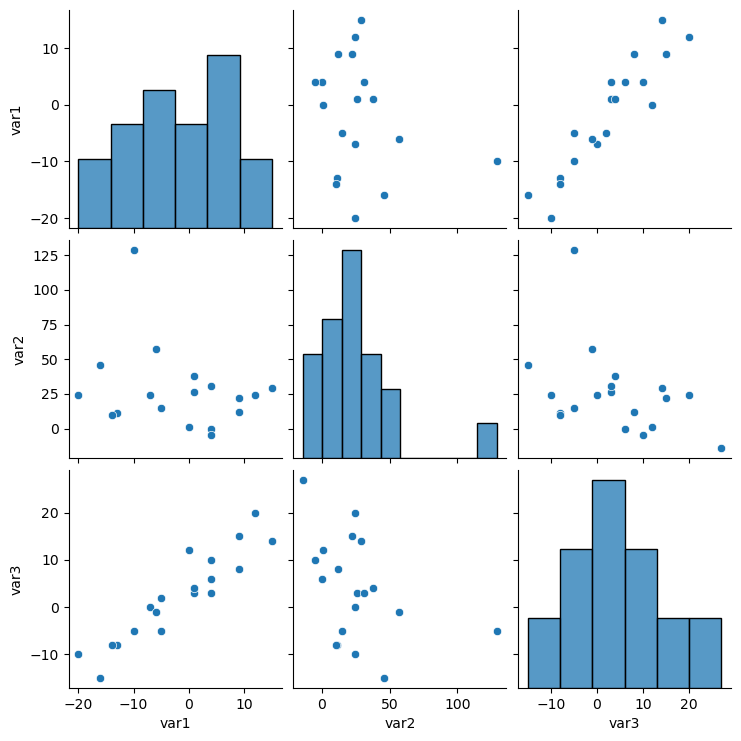

In [29]:
# pairplot
sns.pairplot(df);#how are the variables look compared to each other
#variable 3 and variable 1 seems to have a correlation 

# Correlation matrix

In [30]:
df.corr()

,var1,var2,var3
var1,1.000000,-0.251468,0.925006
var2,-0.251468,1.000000,-0.400850
var3,0.925006,-0.400850,1.000000


# Data error rates

In [9]:
# check for NaN's
df.isna()

,var1,var2,var3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
9,True,False,False
10,False,False,False


In [10]:
df.isna().sum()

var1    1
var2    1
var3    0
dtype: int64

In [11]:
# get error counts
errorRates = df.isna().sum().values

# convert to rates and print out
for i,colname in enumerate(df.columns):
  er = 100*errorRates[i]/len(df)
  print(f'{colname} had an error rate of {er}%')

var1 had an error rate of 5.0%
var2 had an error rate of 5.0%
var3 had an error rate of 0.0%


In [12]:
# drop rows with NaN's
df2 = df.dropna()

df2

,var1,var2,var3
0,-5.0,15.0,-5
1,-13.0,11.0,-8
2,0.0,1.0,12
3,9.0,22.0,15
4,4.0,0.0,6
5,-7.0,24.0,0
6,-16.0,46.0,-15
7,15.0,29.0,14
10,1.0,26.0,3
11,-10.0,129.0,-5


In [13]:
df2.describe()

,var1,var2,var3
count,18.000000,18.000000,18.000000
mean,-1.777778,27.444444,2.388889
std,10.160799,29.900270,9.702267
min,-20.000000,-5.000000,-15.000000
25%,-9.250000,11.250000,-5.000000
50%,0.500000,24.000000,3.000000
75%,4.000000,30.500000,9.500000
max,15.000000,129.000000,20.000000
